In [852]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [853]:
df=pd.read_csv(r"C:\Users\ranga\Documents\DATASETS\ML data sets\laptop_price - dataset.csv")
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [855]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [856]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

### No null values in dataset

# EDA & Data cleaning & Feature Engineeering

In [857]:
num_col=[col for col in df.columns if df[col].dtype !='O']
cat_col=[col for col in df.columns if col not in num_col]

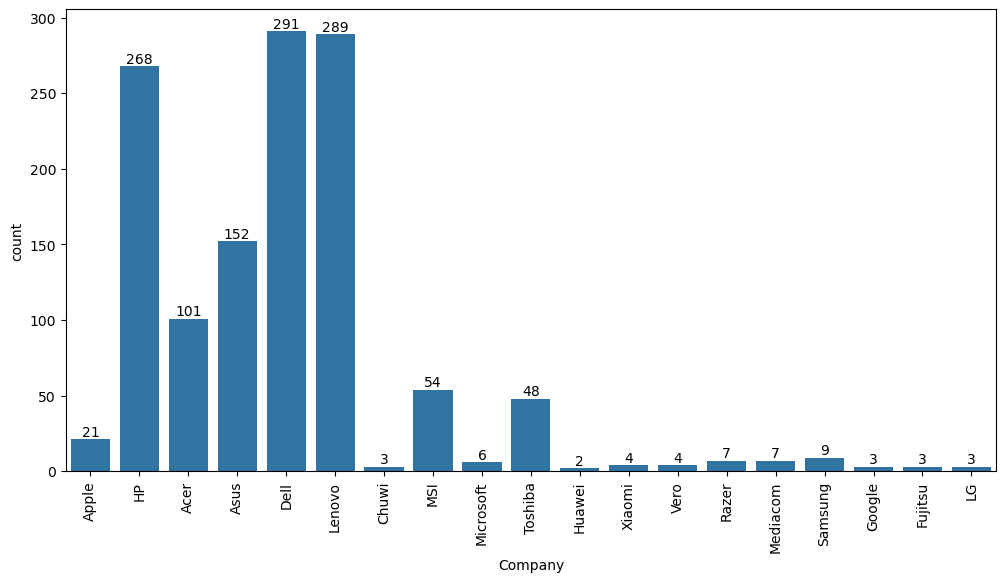

In [858]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df['Company'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [859]:
threshold = 10

company_counts = df['Company'].value_counts()
other_companies = company_counts[company_counts < threshold].index.tolist()
df['Company'] = np.where(df['Company'].isin(other_companies), 'Others', df['Company'])

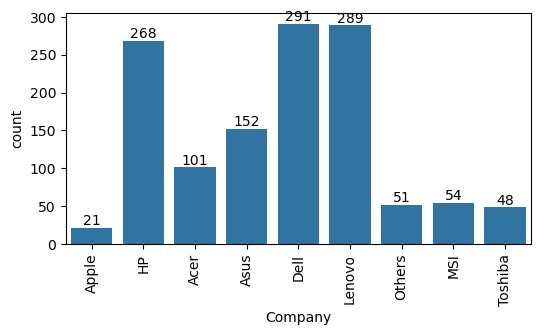

In [860]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x=df['Company'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [861]:
df.drop('Product',inplace=True,axis=1)

### Due to the amount of Cardinality in this feature it is btter to drop the feature. 

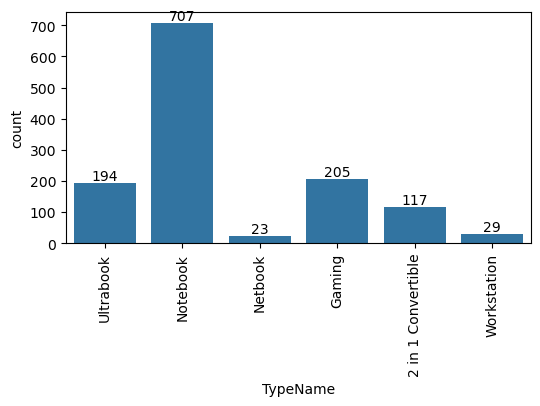

In [862]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x=df['TypeName'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

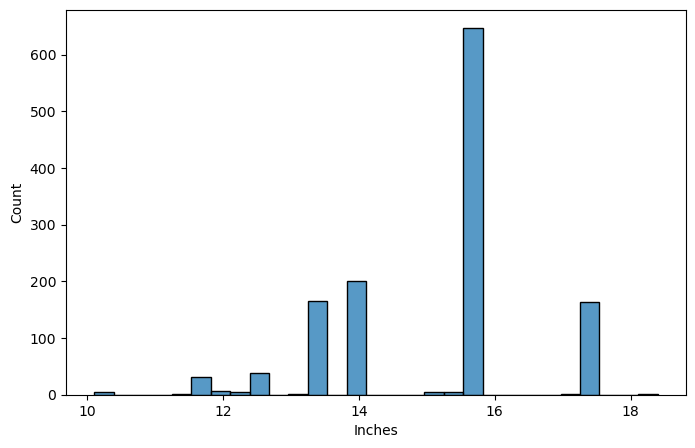

In [863]:
plt.figure(figsize=(8,5))
ax=sns.histplot(x=df['Inches'])
plt.show()

In [864]:
df['Inches'].value_counts()

Inches
15.6    647
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

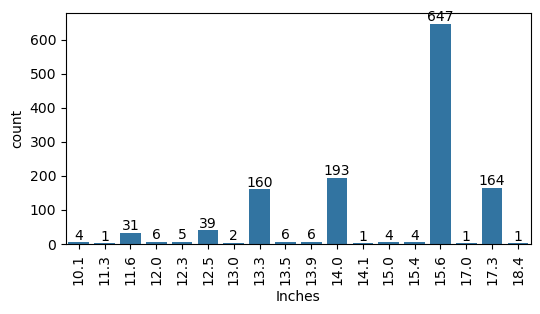

In [865]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x=df['Inches'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

### as we can see there are more laptops with 15. inches size
### let us engineering it as small, regular, big size 

In [866]:
df['size']=np.where(df['Inches']<=14,'small',
                    np.where(df['Inches']<16,'regular','big'))

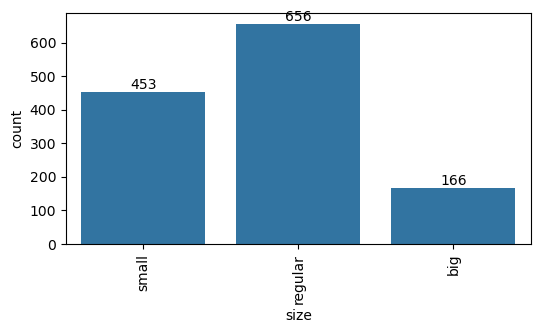

In [867]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x=df['size'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='size', ylabel='Price (Euro)'>

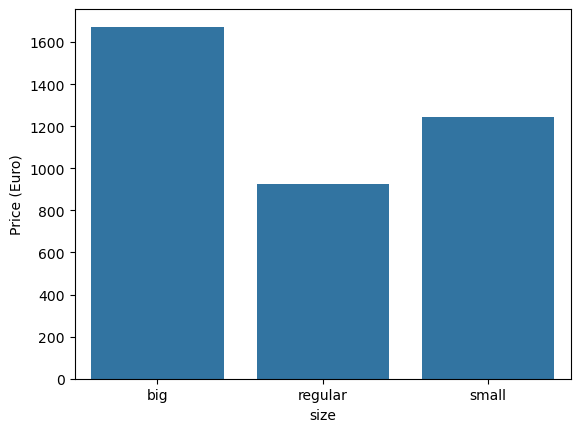

In [868]:
a=pd.DataFrame(df.groupby('size')['Price (Euro)'].mean())
sns.barplot(x='size', y='Price (Euro)', data=a)


### as we can see the regualrly used sizes have lower prises than small or big sizes

In [869]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

#### here the feature has so much noise as we have so much extra info about the screen to lets divide this into seperate features as X_res,y_res,IPS,4K,Touchscreen

In [870]:
df[['x_res','y_res']]=df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df['x_res']=df['x_res'].astype(float)
df['y_res']=df['y_res'].astype(float)

In [871]:
df['IPS']=df['ScreenResolution'].str.contains('IPS').astype(int)
df['4K']=df['ScreenResolution'].str.contains('4K').astype(int)
df['TouchScreen']=df['ScreenResolution'].str.contains('Touchscreen').astype(int)

### Lets us calculate "aspect ratio and Pixels per inch (PPI)

In [872]:
df['ppi'] = ((df['x_res']**2 + df['y_res']**2) ** 0.5 / df['Inches']).astype(float).round(2)  
df['aspect_ratio'] = (df['x_res'] / df['y_res']).round(2)


In [873]:
df.drop(['ScreenResolution','x_res','y_res'],axis=1,inplace=True)

In [874]:
df.head(3)

,Company,TypeName,Inches,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),size,IPS,4K,TouchScreen,ppi,aspect_ratio
0,Apple,Ultrabook,13.3,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,small,1,0,0,226.98,1.60
1,Apple,Ultrabook,13.3,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,small,0,0,0,127.68,1.60
2,HP,Notebook,15.6,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,regular,0,0,0,141.21,1.78


<Axes: xlabel='aspect_ratio', ylabel='Price (Euro)'>

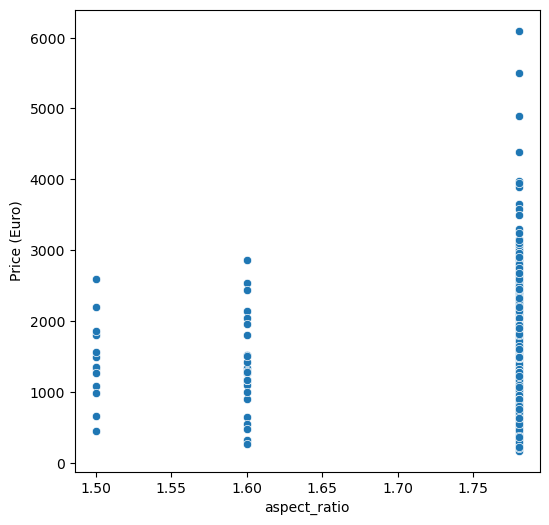

In [875]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='aspect_ratio',y='Price (Euro)',data=df)

<Axes: xlabel='ppi', ylabel='Price (Euro)'>

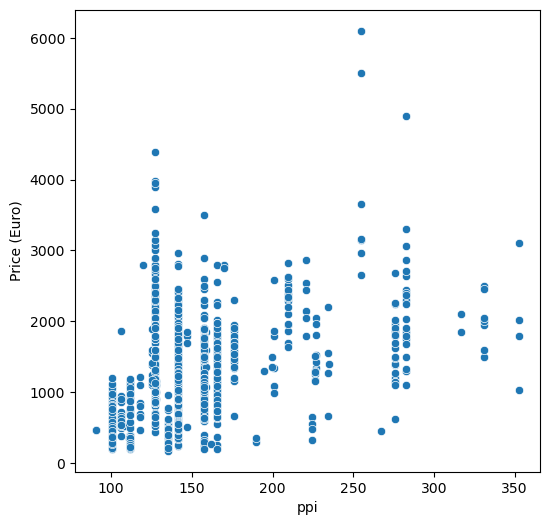

In [876]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='ppi',y='Price (Euro)',data=df)

In [877]:
b=pd.DataFrame(df.groupby('TouchScreen')['Price (Euro)'].mean())
b

,Price (Euro)
TouchScreen,
0,1079.944204
1,1453.118085


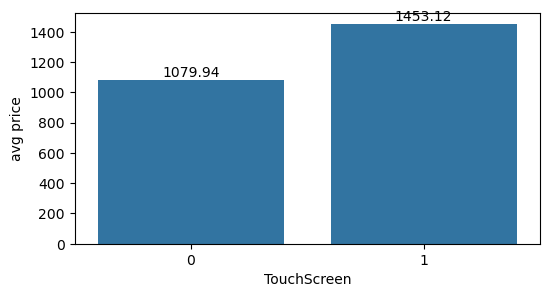

In [878]:
plt.figure(figsize=(6,3))
ax=sns.barplot(x='TouchScreen',y='Price (Euro)',data=b)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.show()

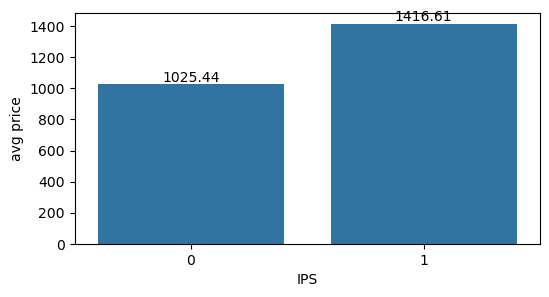

In [879]:
c=pd.DataFrame(df.groupby('IPS')['Price (Euro)'].mean())
plt.figure(figsize=(6,3))
ax=sns.barplot(x='IPS',y='Price (Euro)',data=c)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.show()

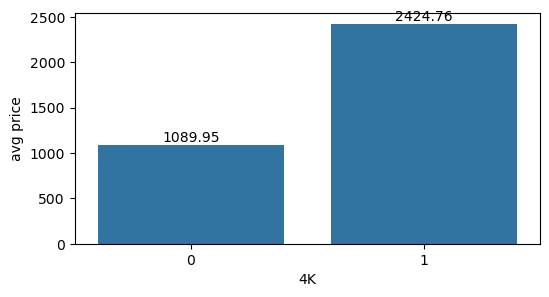

In [880]:
d=pd.DataFrame(df.groupby('4K')['Price (Euro)'].mean())
plt.figure(figsize=(6,3))
ax=sns.barplot(x='4K',y='Price (Euro)',data=d)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.show()

### we can see significant difference when IPS,4K,Touch screens are there 

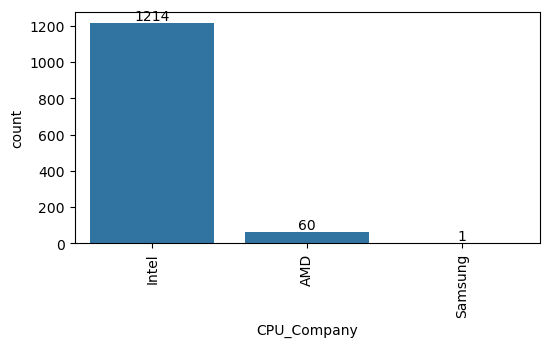

In [881]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x=df['CPU_Company'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

### majority of the CPU units are from INTEL make

In [882]:
df['CPU_Type'].unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

### the CPU column has so much cardinality but the CPU is a significant unit in laptops and the price will be dependent on it so we will engineer the feature in to brand and tier of the CPU

In [883]:
def get_brand_and_tier(row):
    s = row['CPU_Type'].lower()    
    # Tier classification
    if any(x in s for x in ['atom', 'celeron', 'pentium']):
        row['CPU_tier'] = 'Low'
    elif any(x in s for x in ['i3', 'a4', 'a6', 'a8', 'a9', 'ryzen 3', 'e-series']):
        row['CPU_tier'] = 'Mid'
    elif any(x in s for x in ['i5', 'fx', 'a10', 'a12', 'ryzen 5']):
        row['CPU_tier'] = 'High'
    elif any(x in s for x in ['i7', 'i9', 'xeon', 'ryzen 7', 'ryzen 9']):
        row['CPU_tier'] = 'Premium'
    else:
        row['CPU_tier'] = 'Other'
    
    return row

# Apply function row-wise
df = df.apply(get_brand_and_tier, axis=1)


In [884]:
df.drop('CPU_Type',inplace=True,axis=1)

In [885]:
df.head(2)

,Company,TypeName,Inches,CPU_Company,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),size,IPS,4K,TouchScreen,ppi,aspect_ratio,CPU_tier
0,Apple,Ultrabook,13.3,Intel,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,small,1,0,0,226.98,1.6,High
1,Apple,Ultrabook,13.3,Intel,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,small,0,0,0,127.68,1.6,High


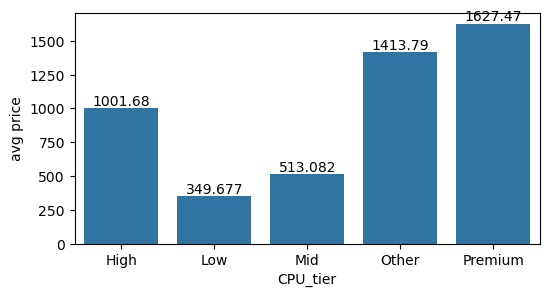

In [886]:
f=pd.DataFrame(df.groupby('CPU_tier')['Price (Euro)'].mean())
plt.figure(figsize=(6,3))
ax=sns.barplot(x='CPU_tier',y='Price (Euro)',data=f)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.show()

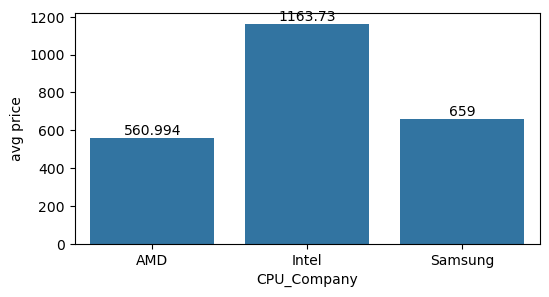

In [887]:
e=pd.DataFrame(df.groupby('CPU_Company')['Price (Euro)'].mean())
plt.figure(figsize=(6,3))
ax=sns.barplot(x='CPU_Company',y='Price (Euro)',data=e)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.show()

### Intel brand has more average prices almost double than the others

<Axes: xlabel='CPU_Frequency (GHz)', ylabel='Price (Euro)'>

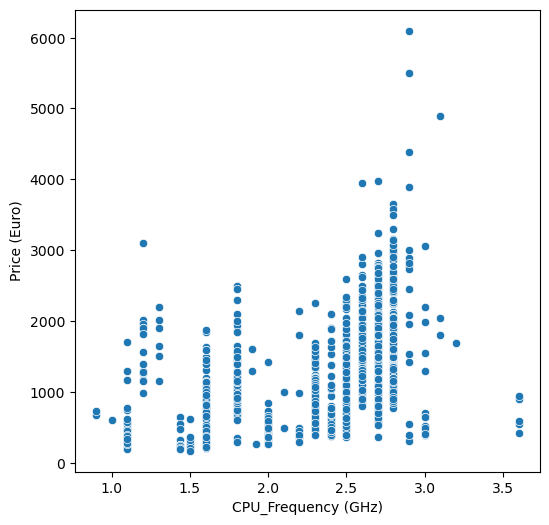

In [888]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='CPU_Frequency (GHz)',y='Price (Euro)',data=df)

### the price increasing momentarily with better CPU_frequency

<Axes: xlabel='RAM (GB)', ylabel='Price (Euro)'>

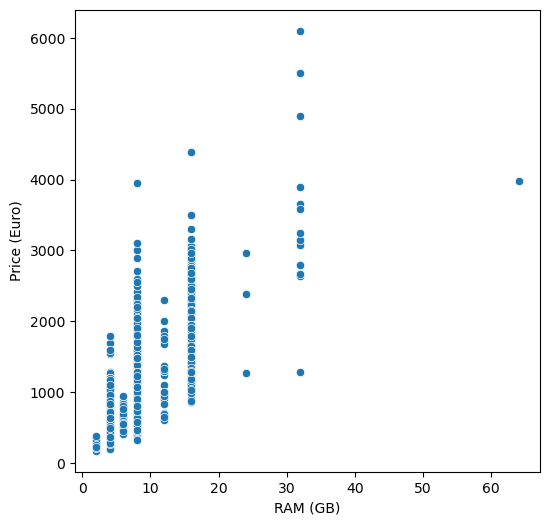

In [889]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='RAM (GB)',y='Price (Euro)',data=df)

### the price increasing momentarily with better RAM storage

In [890]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [891]:
for i in ['SSD','HDD','Flash Storage','Hybrid']:
    df[i+'_storage']=df['Memory'].str.contains(i).astype(int)

In [892]:
def convert_memory(memory_str):
    
    total_gb = 0
    components = memory_str.split('+')
    for component in components:
        component = component.strip().upper()
        
        if 'TB' in component:
            value = float(component.replace('TB', '').replace(' ', '').replace('SSD', '').replace('HDD', '').replace('HYBRID', '').replace('FLASHSTORAGE', ''))
            total_gb += value * 1024
        elif 'GB' in component:
            value = float(component.replace('GB', '').replace(' ', '').replace('SSD', '').replace('HDD', '').replace('HYBRID', '').replace('FLASHSTORAGE', ''))
            total_gb += value
            
    return total_gb

df['total_memory_gb'] = df['Memory'].apply(convert_memory)


In [893]:
df.drop('Memory',inplace=True,axis=1)

In [894]:
df['GPU_Type'].unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce GTX 1060', 'GeForce 150MX', 'Iris Graphics 540',
       'Radeon RX 580', 'GeForce 920MX', 'Radeon R4 Graphics',
       'Radeon 520', 'GeForce GTX 1070', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'R4 Graphics', 'GeForce GTX 940MX',
       'Radeon RX 560', 'GeForce 920M', 'Radeon R7 M445', 'Radeon RX 550',
       'GeForce GTX 1050M', 'HD Graphics 515', 'Radeon R5 M420',
       'HD Graphics 505', 'GTX 980 SLI', 'R17M-M1-70', 'GeForce GTX 1080',
       'Quadro M1200', 'GeForce GTX 950M', 'FirePro W4190M',
       'GeForce G

In [895]:
def get_performance_tier(gpu_name):
    gpu_name = str(gpu_name).strip().upper()
    
    # High-end GPUs
    high_tier_keywords = ['GTX 1080', 'GTX 1070', 'GTX 980', 'RTX', 'QUADRO P', 'QUADRO M5', 'FIREPRO W']
    for keyword in high_tier_keywords:
        if keyword in gpu_name:
            return 'High'
            
    # Mid-range GPUs
    mid_tier_keywords = ['GTX 1060', 'GTX 1050', 'GTX 970', 'GTX 960', 'RX 580', 'RX 570', 
                         'R9', 'RADEON PRO', 'IRIS PLUS', 'QUADRO M2', 'QUADRO M1']
    for keyword in mid_tier_keywords:
        if keyword in gpu_name:
            return 'Mid'
            
    # Low-end GPUs
    low_tier_keywords = ['HD GRAPHICS', 'UHD GRAPHICS', 'RADEON R2', 'RADEON R3', 'RADEON R4', 'RADEON R5', 
                         '920', '930', 'MX130', 'MX150']
    for keyword in low_tier_keywords:
        if keyword in gpu_name:
            return 'Low'
            
    return 'Others'

df['GPU_performance_tier'] = df['GPU_Type'].apply(get_performance_tier)


In [896]:
df.drop('GPU_Type',inplace=True,axis=1)

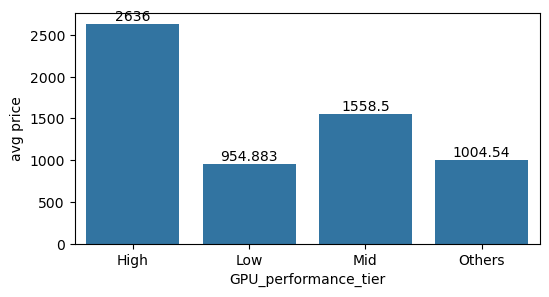

In [897]:
e=pd.DataFrame(df.groupby('GPU_performance_tier')['Price (Euro)'].mean())
plt.figure(figsize=(6,3))
ax=sns.barplot(x='GPU_performance_tier',y='Price (Euro)',data=e)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.show()

### As you can see the high tier has signicantly higher prices,

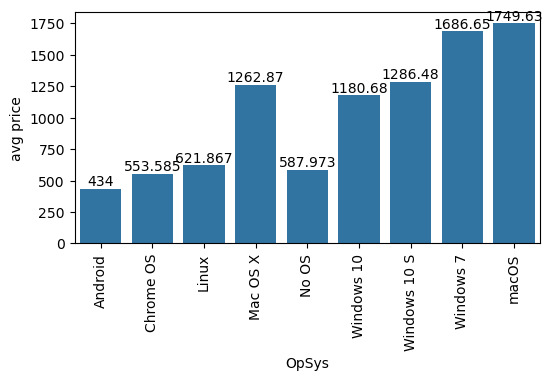

In [898]:
e=pd.DataFrame(df.groupby('OpSys')['Price (Euro)'].mean())
plt.figure(figsize=(6,3))
ax=sns.barplot(x='OpSys',y='Price (Euro)',data=e)
plt.bar_label(ax.containers[0])
plt.ylabel('avg price')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Weight (kg)', ylabel='Price (Euro)'>

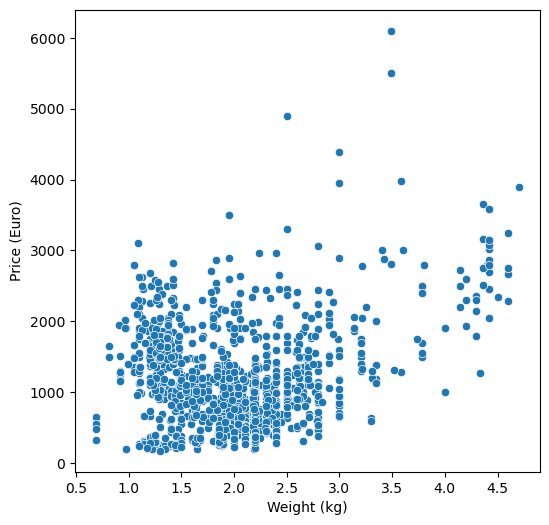

In [899]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Weight (kg)',y='Price (Euro)',data=df)

### Encoding Categorical Varibales

In [900]:
size_code={'small':0,'regular':0,'big':2}
df['size']=df['size'].map(size_code)

In [901]:
CPU_tier_code={'Other':0,'Low':1,'Mid':2,'High':3,'Premium':4}
df['CPU_tier']=df['CPU_tier'].map(CPU_tier_code)

In [902]:
GPU_tier_code={'Others':0,'Low':1,'Mid':2,'High':3,}
df['GPU_performance_tier']=df['GPU_performance_tier'].map(GPU_tier_code)

In [903]:
nominal=['Company','TypeName','CPU_Company','GPU_Company','OpSys']

In [904]:
df=pd.get_dummies(df,columns=nominal,dtype=int,drop_first=True)

In [905]:
df.shape

(1275, 44)

In [906]:
x=df.drop('Price (Euro)',axis=1)
y=df['Price (Euro)']

In [907]:
nulls=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        nulls.append(i)

print(nulls)

[]


In [908]:
df.head(5)

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),size,IPS,4K,TouchScreen,ppi,aspect_ratio,CPU_tier,SSD_storage,HDD_storage,Flash Storage_storage,Hybrid_storage,total_memory_gb,GPU_performance_tier,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Others,Company_Toshiba,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU_Company_Intel,CPU_Company_Samsung,GPU_Company_ARM,GPU_Company_Intel,GPU_Company_Nvidia,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,2.3,8,1.37,1339.69,0,1,0,0,226.98,1.60,3,1,0,0,0,128.0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,13.3,1.8,8,1.34,898.94,0,0,0,0,127.68,1.60,3,0,0,1,0,128.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,15.6,2.5,8,1.86,575.00,0,0,0,0,141.21,1.78,3,1,0,0,0,256.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,15.4,2.7,16,1.83,2537.45,0,1,0,0,220.53,1.60,4,1,0,0,0,512.0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,13.3,3.1,8,1.37,1803.60,0,1,0,0,226.98,1.60,3,1,0,0,0,256.0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [909]:
num_col =['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)','ppi','aspect_ratio','total_memory_gb']

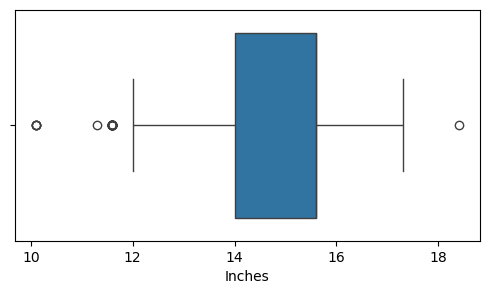

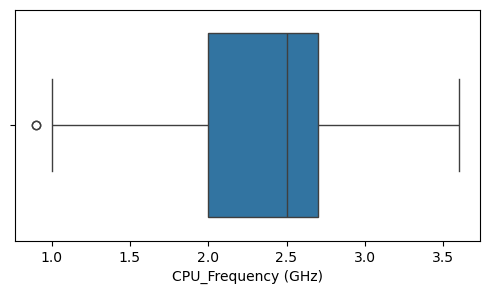

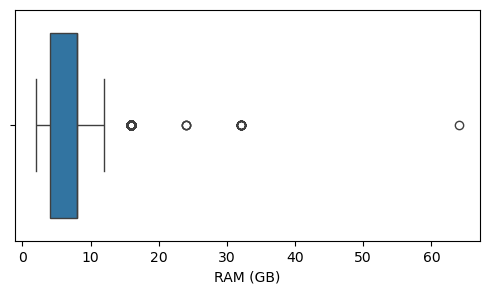

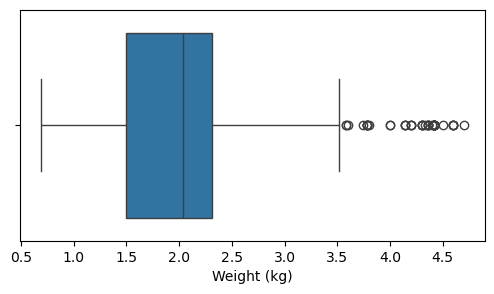

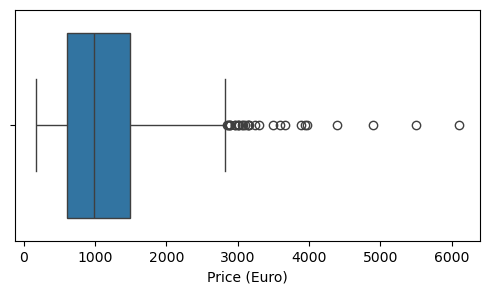

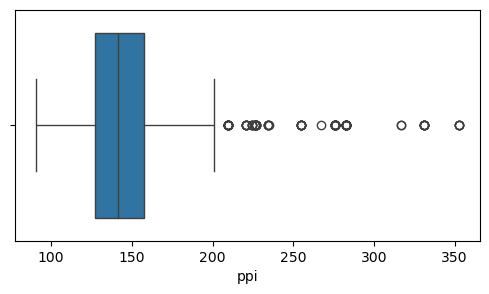

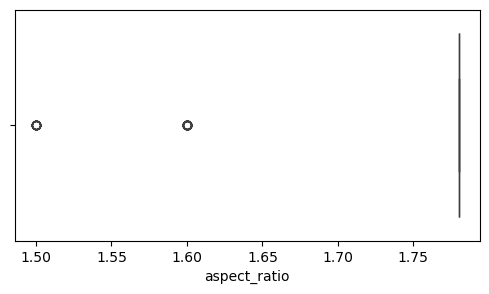

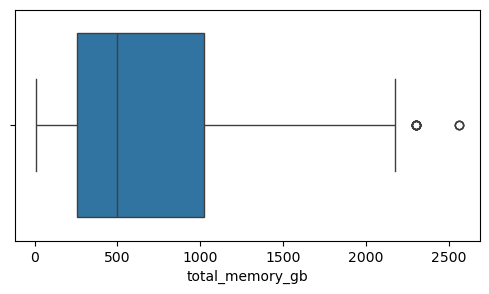

In [910]:
for i in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[i])
    plt.show()

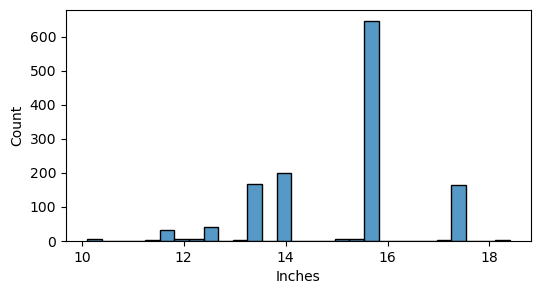

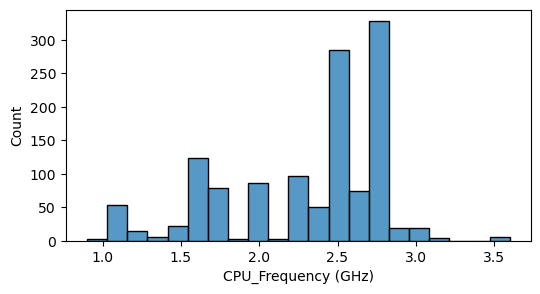

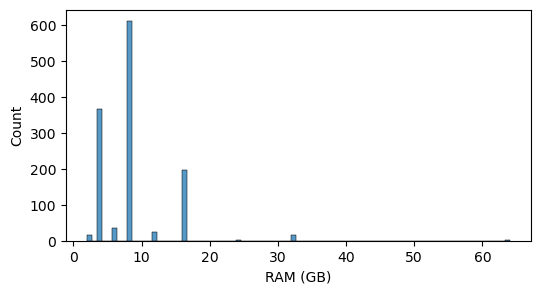

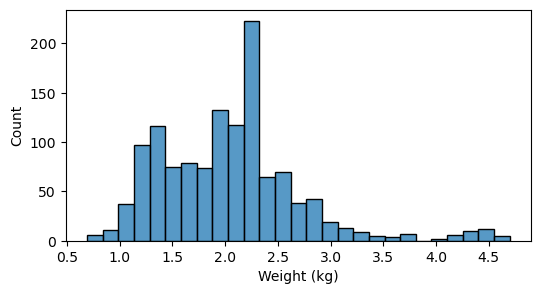

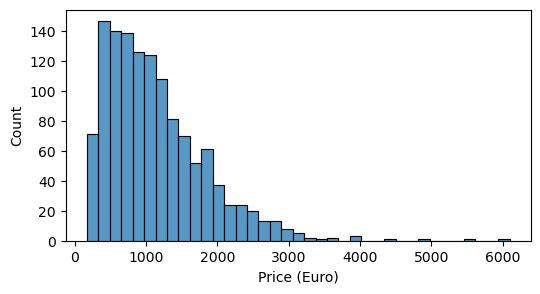

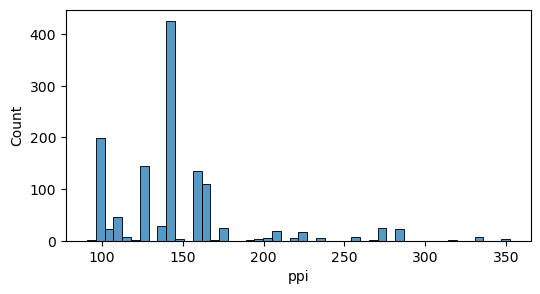

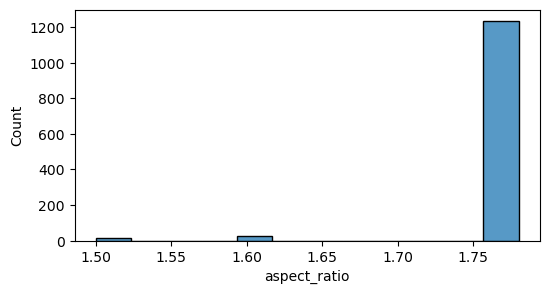

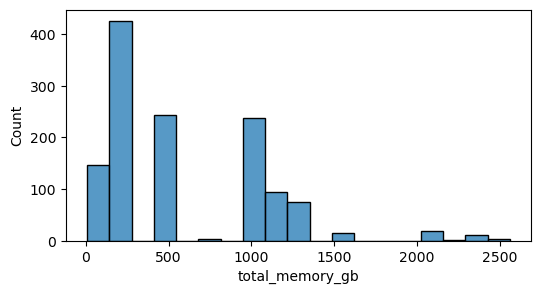

In [911]:
for i in num_col:
    plt.figure(figsize=(6,3))
    sns.histplot(x=df[i])
    plt.show()

### As we are currently having outliers, which are important attributes in pricing we will use RandomForest or GradientBoost like ensembles technques for better performance

In [912]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [913]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200,400],
    'max_depth': [None, 10, 20],
    'min_samples_split':[2,5]
}

model = RandomForestRegressor(random_state=42)

# Use KFold CV for regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)



Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8235627855953747


In [914]:
rand=grid_search.best_estimator_
y_pred=rand.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

print('r2score:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',root_mean_squared_error(y_test,y_pred))

r2score: 0.8563593518251312
MSE: 67500.65422041464
RMSE: 259.8088801800559


## As we already tried in background we seen even with dimentional reduction with feature importance the r2score is etter with all features so this model is better

In [922]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5],   
    'min_samples_split': [2, 5, 10]
    
}


gbr = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=kf,
    scoring="r2",
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.8668976850367727


In [923]:
gradb=grid_search.best_estimator_
y_pred=gradb.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

print('r2score:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',root_mean_squared_error(y_test,y_pred))

r2score: 0.8088938910096088
MSE: 82255.72118787597
RMSE: 286.8025822545466


### As we can see RandomForest gives the best model